In [1]:
import numpy as np                                                     # ndarrys for gridded data
import pandas as pd                                                    # DataFrames for tabular data
import os                                                              # set working directory, run executables
import matplotlib.pyplot as plt                                        # for plotting
import matplotlib.image as mpimg 
import seaborn as sns    
import h5py

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

import tensorflow as tf              # Importa TF2
from tensorflow import keras         # Importa Keras
from tensorflow.keras import layers, regularizers  # Ferramentes do Keras mais usadas para acesso mais rápido
from keras.layers import Dense
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score




2022-07-22 21:24:43.150033: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-07-22 21:24:43.153172: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-07-22 21:24:43.153183: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


(209, 64, 64, 3)
(209, 1)
(50, 64, 64, 3)
(50, 1)


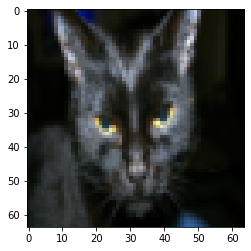

In [2]:
def load_dataset():

    with h5py.File('train_catvnoncat.h5', "r") as train_dataset:
        train_set_x_orig = np.array(train_dataset["train_set_x"][:])
        train_set_y_orig = np.array(train_dataset["train_set_y"][:])

    with h5py.File('test_catvnoncat.h5', "r") as test_dataset:
        test_set_x_orig = np.array(test_dataset["test_set_x"][:])
        test_set_y_orig = np.array(test_dataset["test_set_y"][:])
        classes = np.array(test_dataset["list_classes"][:])

    train_set_y_orig = train_set_y_orig.reshape((train_set_y_orig.shape[0], 1))
    test_set_y_orig = test_set_y_orig.reshape((test_set_y_orig.shape[0], 1))

    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

print(train_set_x_orig.shape)
print(train_set_y.shape)
print(test_set_x_orig.shape)
print(test_set_y.shape)

index = 25
plt.imshow(train_set_x_orig[index])
#print ("y = " + str(train_set_y[:, index]) + ", it’s a " + classes[np.squeeze(train_set_y[:, index])].decode("utf-8") + " picture.")


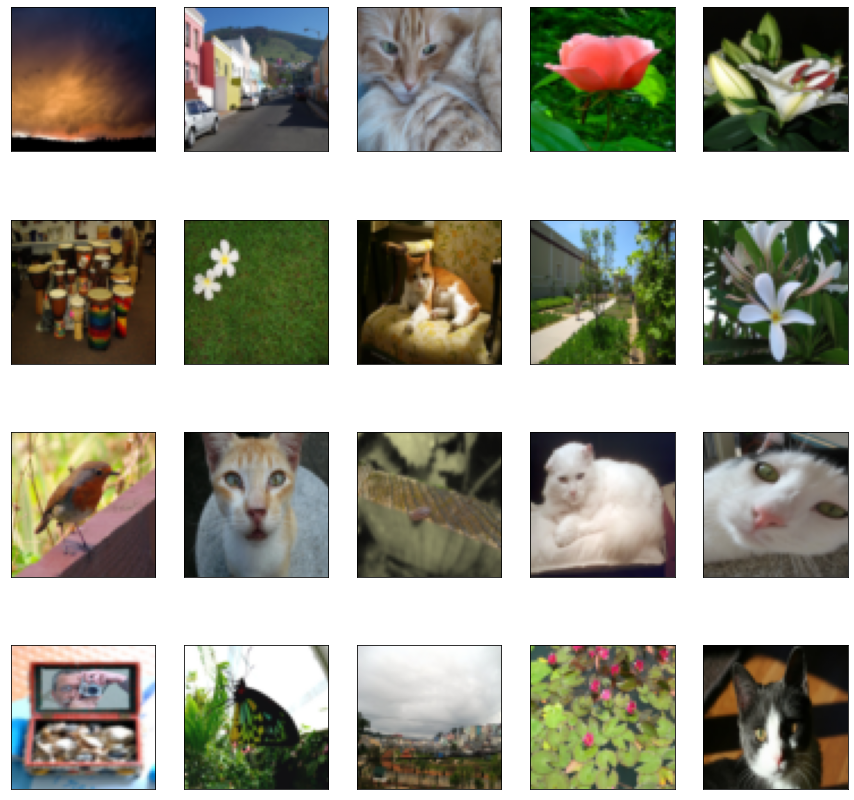

In [3]:
train_set_x_orig = train_set_x_orig/255.0
test_set_x_orig = test_set_x_orig/255.0

n=20
plt.figure(figsize=(15, 15))
for i in range(n):
    ax = plt.subplot(4, 5, i + 1)
    plt.imshow(train_set_x_orig[i])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()


In [4]:
# Model / data parameters
num_classes = 2
input_shape = (64, 64, 3)

# Make sure images have shape (28, 28, 1)
train_images = train_set_x_orig
val_images = test_set_x_orig     
train_set_y= to_categorical(train_set_y, num_classes)
test_set_y = to_categorical(test_set_y, num_classes)

print("train images shape:", train_images.shape)
print(train_images.shape[0], "train samples")
print(val_images.shape[0], "test samples")


train images shape: (209, 64, 64, 3)
209 train samples
50 test samples


In [5]:
model_cnn = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Dropout(0.3),     
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.3),
        layers.Dense(512, activation="relu"),
        layers.Dense(num_classes, activation="softmax"),
    ]
)
lr=0.002
opt = tf.keras.optimizers.Adam(learning_rate=lr)
# Compile the model.
model_cnn.compile(
  opt,
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)
model_cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 31, 31, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 12544)             0

2022-07-22 21:24:44.684612: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-22 21:24:44.684927: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-07-22 21:24:44.684958: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2022-07-22 21:24:44.684980: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2022-07-22 21:24:44.685021: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Co

(209, 64, 64, 3)
(209, 2)
(50, 64, 64, 3)
(50, 2)
Epoch 1/150
4/4 [==============================] - 1s 81ms/step - loss: 6.9831 - accuracy: 0.5120 - val_loss: 0.7458 - val_accuracy: 0.3400
Epoch 2/150
4/4 [==============================] - 0s 51ms/step - loss: 0.6602 - accuracy: 0.6555 - val_loss: 0.7129 - val_accuracy: 0.3400
Epoch 3/150
4/4 [==============================] - 0s 50ms/step - loss: 0.6550 - accuracy: 0.6555 - val_loss: 0.7793 - val_accuracy: 0.3400
Epoch 4/150
4/4 [==============================] - 0s 49ms/step - loss: 0.7272 - accuracy: 0.6316 - val_loss: 0.6970 - val_accuracy: 0.4400
Epoch 5/150
4/4 [==============================] - 0s 47ms/step - loss: 0.6196 - accuracy: 0.6794 - val_loss: 0.7529 - val_accuracy: 0.3400
Epoch 6/150
4/4 [==============================] - 0s 51ms/step - loss: 0.6281 - accuracy: 0.6555 - val_loss: 0.6920 - val_accuracy: 0.4000
Epoch 7/150
4/4 [==============================] - 0s 50ms/step - loss: 0.5873 - accuracy: 0.6890 - val_loss: 

Text(0.5, 1.0, 'learning rate=0.005')

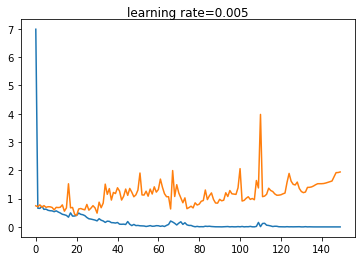

In [6]:
#early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=100)

# history = model_cnn.fit(
#   train_images,
#   train_set_y,
#   epochs=30,
#   batch_size=128,
#   validation_data=(val_images, test_set_y),
#   verbose = 1,
#   callbacks=[early_stop]
# )
print(train_images.shape)
print(train_set_y.shape)
print(test_set_x_orig.shape)
print(test_set_y.shape)

history = model_cnn.fit(train_images, train_set_y, validation_data = (test_set_x_orig, test_set_y), batch_size = 64, epochs=150, verbose=1)

# plot learning curves
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.title('learning rate='+str(lr), pad=-80)

7/7 [==============================] - 0s 7ms/step

Accuracy: 1.0000



Text(0.5, 15.0, 'Predicted label')

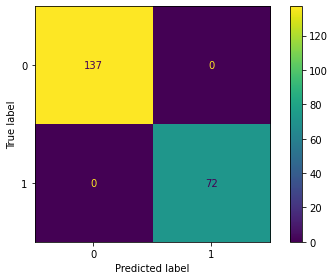

In [7]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

ytrainpred = model_cnn.predict(train_images)
print('\nAccuracy: {:.4f}\n'.format(accuracy_score(train_set_y.argmax(axis=1), ytrainpred.argmax(axis=1))))

#Your input to confusion_matrix must be an array of int not one hot encodings.
ConfusionMatrixDisplay.from_predictions(train_set_y.argmax(axis=1), ytrainpred.argmax(axis=1))


plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

2/2 [==============================] - 0s 7ms/step

Accuracy: 0.6400



Text(0.5, 15.0, 'Predicted label')

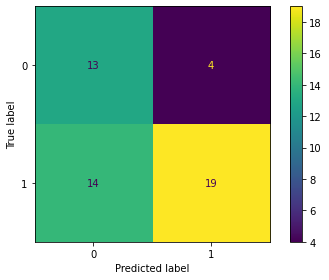

In [8]:
ytestpred = model_cnn.predict(val_images)
print('\nAccuracy: {:.4f}\n'.format(accuracy_score(test_set_y.argmax(axis=1), ytestpred.argmax(axis=1))))

#Your input to confusion_matrix must be an array of int not one hot encodings.
ConfusionMatrixDisplay.from_predictions(test_set_y.argmax(axis=1), ytestpred.argmax(axis=1))


plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

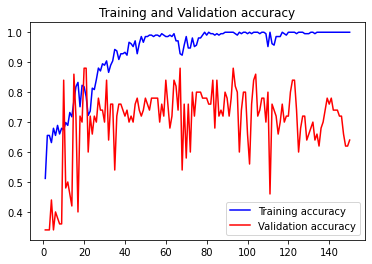

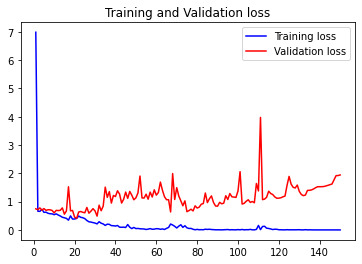

In [9]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'b', label= 'Training accuracy')
plt.plot(epochs, val_acc, 'r', label= 'Validation accuracy')
plt.title('Training and Validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'b', label= 'Training loss')
plt.plot(epochs, val_loss, 'r', label= 'Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()